In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN

In [6]:
two_blobs = pd.read_csv('../DATA/cluster_two_blobs.csv')

In [2]:
two_blobs_outliers = pd.read_csv('../DATA/cluster_two_blobs_outliers.csv')

<AxesSubplot:xlabel='X1', ylabel='X2'>

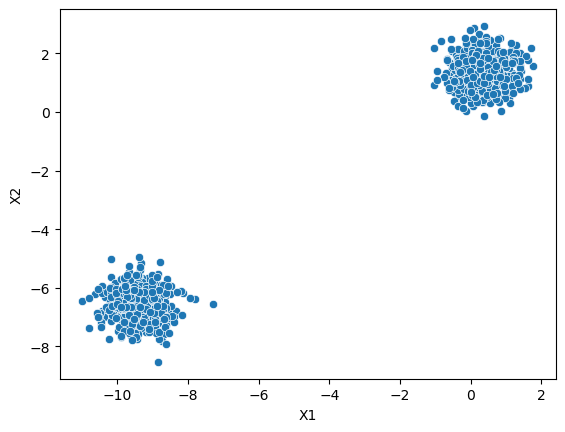

In [7]:
sns.scatterplot(data = two_blobs, x = 'X1', y = 'X2')

<AxesSubplot:xlabel='X1', ylabel='X2'>

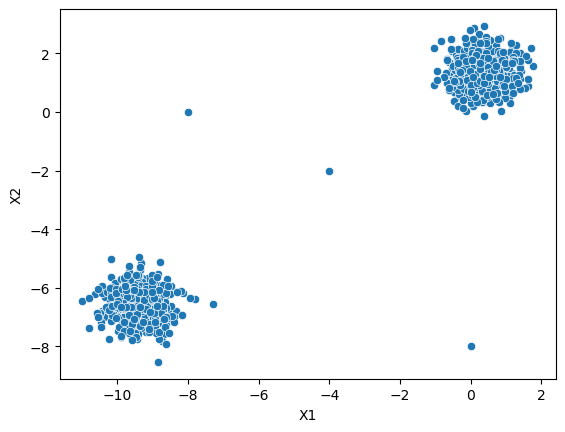

In [8]:
sns.scatterplot(data = two_blobs_outliers, x = 'X1', y = 'X2')

In [9]:
def display_categories(model, data):
    labels = model.fit_predict(data)
    sns.scatterplot(data = data, x = 'X1', y = 'X2', hue = labels, palette = 'Set1')

In [10]:
dbscan = DBSCAN()

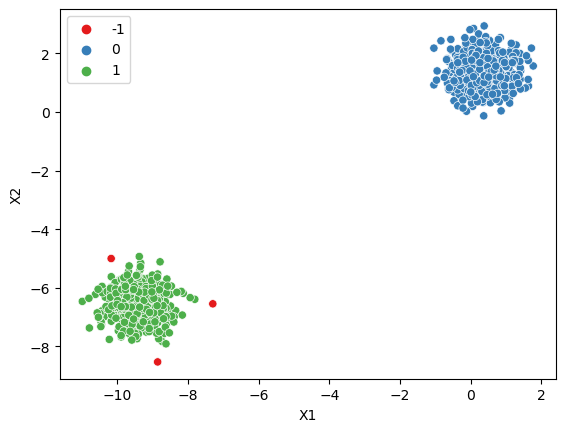

In [11]:
display_categories(dbscan, two_blobs)

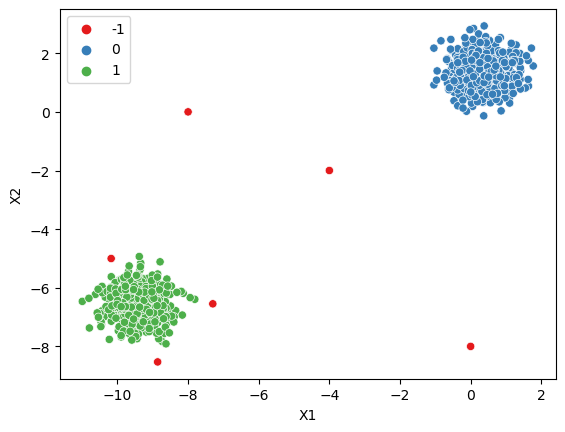

In [12]:
display_categories(dbscan, two_blobs_outliers)

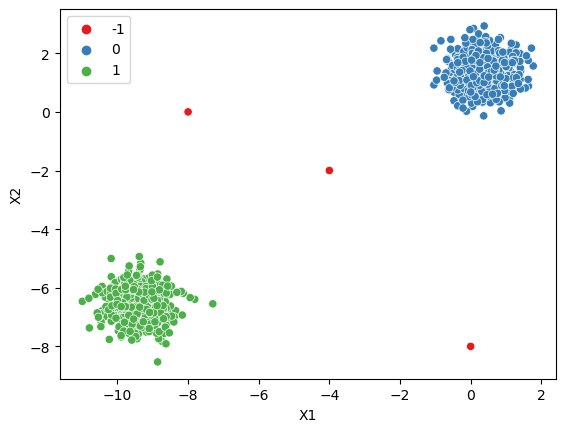

In [34]:
dbscan_1 = DBSCAN(eps=0.70)
display_categories(dbscan_1, two_blobs_outliers)

In [17]:
np.sum(dbscan_1.labels_ == -1) * 100 / len(dbscan_1.labels_) # < 1%

0.29910269192422734

In [21]:
outliers_percent = []
number_of_outliers = []

for eps in np.linspace(0.001,7, 200):
    dbscan = DBSCAN(eps = eps)
    dbscan.fit(two_blobs_outliers)
    
    number_of_outliers.append(np.sum(dbscan.labels_ == -1))
    outliers_percent.append(np.sum(dbscan.labels_ == -1) * 100 / len(dbscan.labels_))

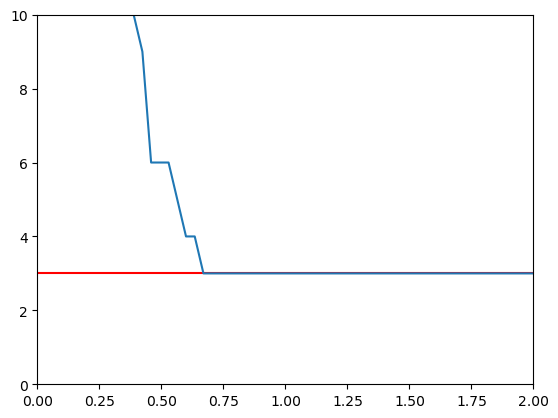

In [27]:
sns.lineplot(x = np.linspace(0.001,7, 200), y = number_of_outliers)
plt.xlim(0,2)
plt.ylim(0,10)
plt.hlines(y = 3, xmin = 0, xmax = 2, color = 'red')

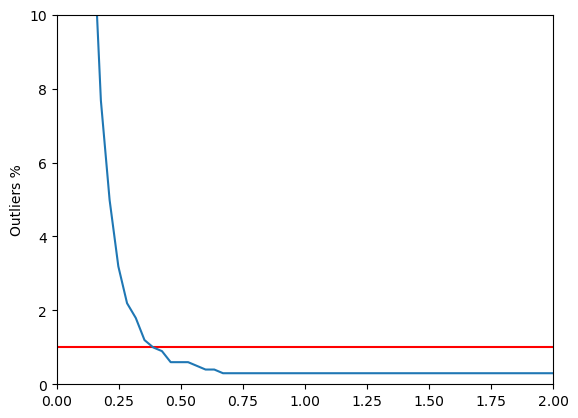

In [30]:
sns.lineplot(x = np.linspace(0.001,7, 200), y = outliers_percent)
plt.xlim(0,2)
plt.ylim(0,10)
plt.ylabel('Outliers %')
plt.hlines(y = 1, xmin = 0, xmax = 2, color = 'red')

In [35]:
outliers_percent = []
number_of_outliers = []

for n in np.arange(1,100):
    dbscan = DBSCAN( min_samples=n)
    dbscan.fit(two_blobs_outliers)
    
    number_of_outliers.append(np.sum(dbscan.labels_ == -1))
    outliers_percent.append(np.sum(dbscan.labels_ == -1) * 100 / len(dbscan.labels_))

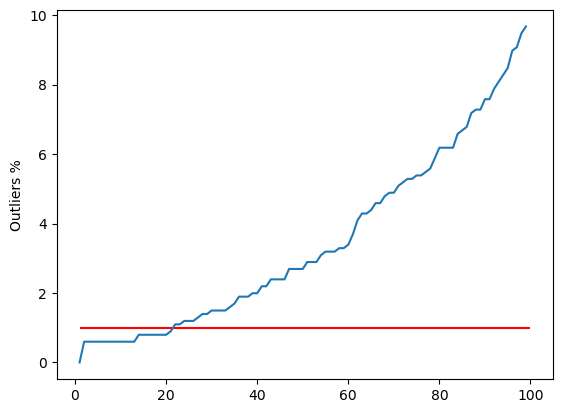

In [39]:
sns.lineplot(x = np.arange(1,100), y = outliers_percent)
plt.ylabel('Outliers %')
plt.hlines(y = 1, xmin = 1, xmax = 100, color = 'red')